In [1]:
from MDP import MountainCar, CartPole
from RLAlgorithms import ESGNStepSARSA, TrueOnlineSARSALambda
import matplotlib.pyplot as plt
import numpy as np

100%|██████████| 2000/2000 [02:29<00:00, 13.36it/s]


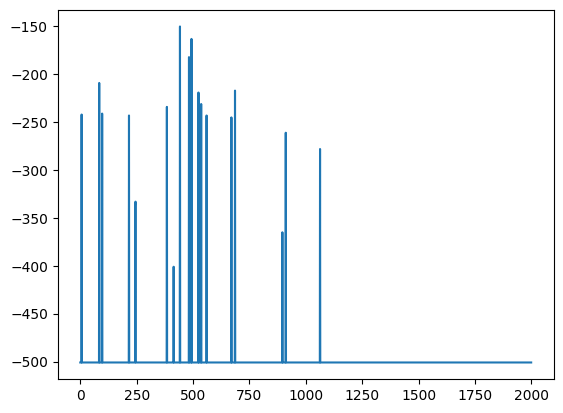

In [9]:
num_trials = 5
mc = MountainCar()

hp_settings = [
    (2, 8, 0.00001, 0.01),
    (3, 8, 0.00001, 0.01),
    (2, 6, 0.00001, 0.01),
    (3, 8, 0.001, 0.01),
    (3, 8, 0.001, 0.1),
    (3, 8, 0.001, 0.05),
]
for h in hp_settings:
    M, n, alpha, epsilon = h
    alg = ESGNStepSARSA(mc, M=M, n=n, alpha=alpha, epsilon=epsilon, approach='epsilon-greedy')
    Gs = np.zeros(alg.num_episodes)

    for _ in range(num_trials):
        alg.reset()
        Gs += np.array(alg.run())

    Gs /= num_trials

    plt.clf()
    plt.plot(range(len(Gs)), Gs)
    plt.savefig(f'experiments/SARSALambda/MountainCar/M-{M}-n-{n}-alpha-{alpha}-epsilon-{epsilon}.png', facecolor='white')